In [1]:
#pip install statmodels.apli as sm
#pip install pingouin --user --no-warn-script-location
#pip install statannotations

In [17]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import asksaveasfile 
import pandas as pd
import seaborn  as sns 
import numpy as np
import pingouin as pg
from pingouin import pairwise_ttests
from statannotations.Annotator import Annotator
%matplotlib inline
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [4]:
import_file_path = filedialog.askopenfilename()
mydata = pd.read_excel(import_file_path, sheet_name="Fig.4", skiprows= None, nrows=20, usecols= [6,7])
print(type(mydata))

<class 'pandas.core.frame.DataFrame'>


In [11]:
#ONE WAY ANOWA AND TUKEY HSD PERFORMANCE:

In [6]:
model = ols('EB_content~group', data = mydata).fit()
aovRes = sm.stats.anova_lm(model, typ=2)
aovRes

,sum_sq,df,F,PR(>F)
group,32.104046,3.0,4.524595,0.017633
Residual,37.842408,16.0,NaN,NaN


In [9]:
print(pairwise_tukeyhsd (mydata["EB_content"], mydata["group"]))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
  Sham   VP150   0.8376 0.8064 -1.9454 3.6206  False
  Sham   VP300   0.6249    0.9 -2.1581 3.4079  False
  Sham Vehicle   3.3257 0.0167  0.5427 6.1087   True
 VP150   VP300  -0.2127    0.9 -2.9957 2.5703  False
 VP150 Vehicle   2.4881 0.0882 -0.2949 5.2711  False
 VP300 Vehicle   2.7009 0.0588 -0.0822 5.4839  False
----------------------------------------------------


In [14]:
aovv = pg.anova(dv='EB_content', between = 'group', data = mydata)
print(aovv)


  Source  ddof1  ddof2         F     p-unc      np2
0  group      3     16  4.524595  0.017633  0.45898


In [15]:
posthoc =  pg.pairwise_tukey(dv='EB_content', between = 'group', data = mydata)
print(posthoc)

       A        B   mean(A)   mean(B)      diff        se         T   p-tukey  \
0   Sham    VP150  0.721747  1.559354 -0.837607  0.972656 -0.861154  0.806421   
1   Sham    VP300  0.721747  1.346629 -0.624881  0.972656 -0.642448  0.900000   
2   Sham  Vehicle  0.721747  4.047483 -3.325736  0.972656 -3.419231  0.016654   
3  VP150    VP300  1.559354  1.346629  0.212725  0.972656  0.218706  0.900000   
4  VP150  Vehicle  1.559354  4.047483 -2.488129  0.972656 -2.558077  0.088185   
5  VP300  Vehicle  1.346629  4.047483 -2.700855  0.972656 -2.776782  0.058754   

     hedges  
0 -0.491934  
1 -0.366999  
2 -1.953236  
3  0.124936  
4 -1.461302  
5 -1.586237  


In [12]:
#PLOT GENERATION

In [ ]:
ax = sns.barplot(x=mydata.group, y=mydata.EB_content, linewidth = 2.5, facecolor = (1,1,1,0), errcolor=".2", edgecolor = '.2', capsize = .2)
ax = sns.swarmplot(x = mydata.group, y = mydata.EB_content,  size = 10, color = "black", alpha = 0.5)
ax.set(ylim=(0,10), ylabel  = "EB content (μg/g)", xlabel = None)

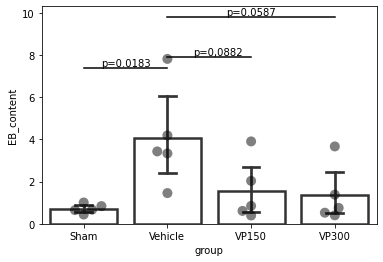

In [68]:
ax = sns.barplot(x=mydata.group, y=mydata.EB_content, linewidth = 2.5, facecolor = (1,1,1,0), errcolor=".2", edgecolor = '.2', capsize = .2)
ax = sns.swarmplot(x = mydata.group, y = mydata.EB_content,  size = 10, color = "black", alpha = 0.5)
#ax.set(ylim=(0,10), ylabel  = "EB content (μg/g)", xlabel = None)
x1, x2 = 1,3
y, h, col, = mydata['EB_content'].max() + 2,0,'k'
plt.plot([x1,x1,x2,x2], [y, y+h, y+h, y], lw = 1.5, c=col)
plt.text((x1+x2)*.5, y+h, "p=0.0587", ha = 'center', va = 'bottom' ,color = col)

x3, x4 = 1,2
y, h, col, = mydata['EB_content'].mean() + 6,0,'k'
plt.plot([x3,x3,x4,x4], [y, y+h, y+h, y], lw = 1.5, c=col)
plt.text((x1+x2)*.4, y+h, "p=0,0882", ha = 'center', va = 'bottom' ,color = col)
x5, x6 = 0,1
y, h, col, = mydata['EB_content'].min() + 7,0,'k'
plt.plot([x5,x5,x6,x6], [y, y+h, y+h, y], lw = 1.5, c=col)
plt.text((x1+x2)*.2, y+h, "p=0.0183", ha = 'right', va = 'bottom' ,color = col)
plt.show()
fig = ax.get_figure()
fig.savefig("plot.pdf")

In [60]:
plt.savefig('wykresssss.pdf')

<Figure size 432x288 with 0 Axes>